# Banking Analysis for Investment

# Importing libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

C:\Users\Geeta\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df=pd.read_csv(r"A:\Projects Machine Learning\Jupyternotebooks\new_train.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## EDA

In [ ]:
df.shape

(32950, 16)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


# Missing Value Analysis

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## we can see that there are no missing value in this dataset

In [ ]:
df.duplicated().sum()

8

## we got some duplicate rowes we need to drop it


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.shape

(32942, 16)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# saprate catigorical and numerical features
catigorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [ ]:
catigorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
numerical_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
for i in catigorical_features:
    print(i,df[i].unique())
    print()
    print('-------------------------------------')
    print()

job ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']

-------------------------------------

marital ['married' 'divorced' 'single' 'unknown']

-------------------------------------

education ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']

-------------------------------------

default ['unknown' 'no' 'yes']

-------------------------------------

housing ['no' 'yes' 'unknown']

-------------------------------------

loan ['no' 'yes' 'unknown']

-------------------------------------

contact ['cellular' 'telephone']

-------------------------------------

month ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

-------------------------------------

day_of_week ['wed' 'mon' 'tue' 'fri' 'thu']

-------------------------------------

poutcome ['nonexistent' 'failure' 'success']

------------------------------

In [ ]:
# we can see there are values unknown in data we have to deal with it
# replacing "unknown" with the mode
for column in catigorical_features:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

## Visualation

In [ ]:
# WE will plot the catogorical features (Univariate Analysis)

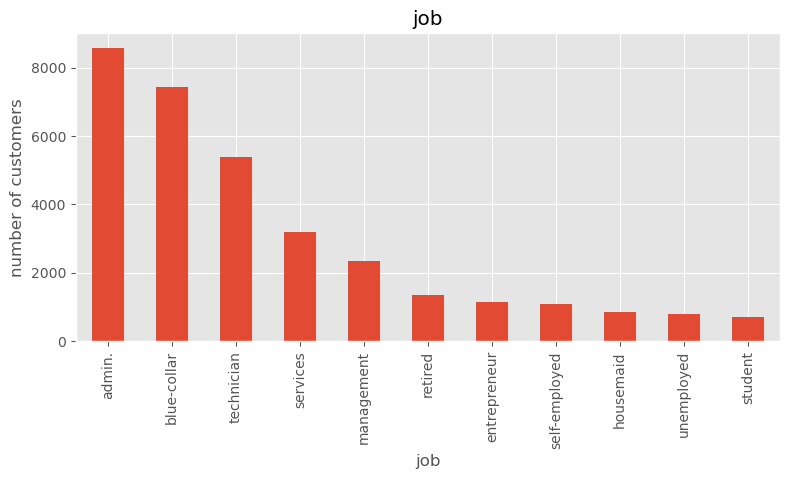

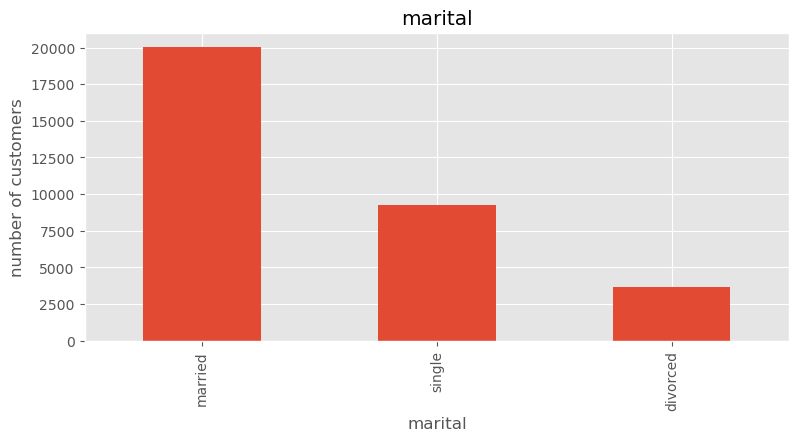

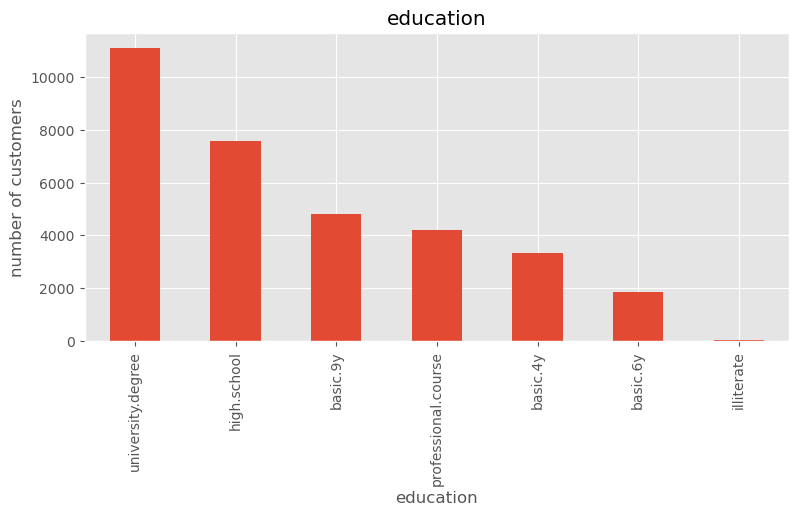

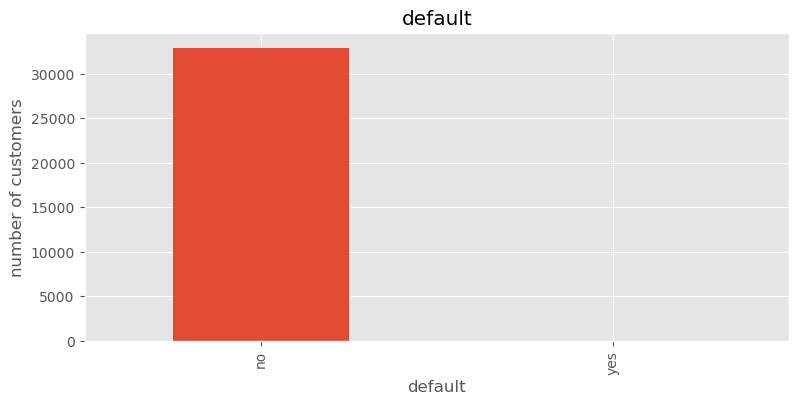

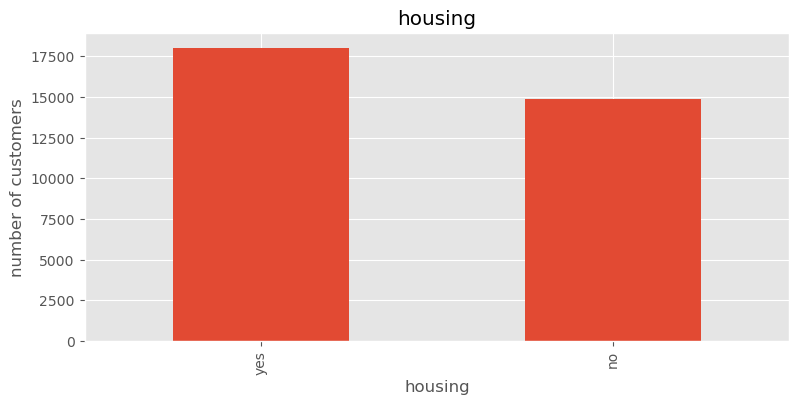

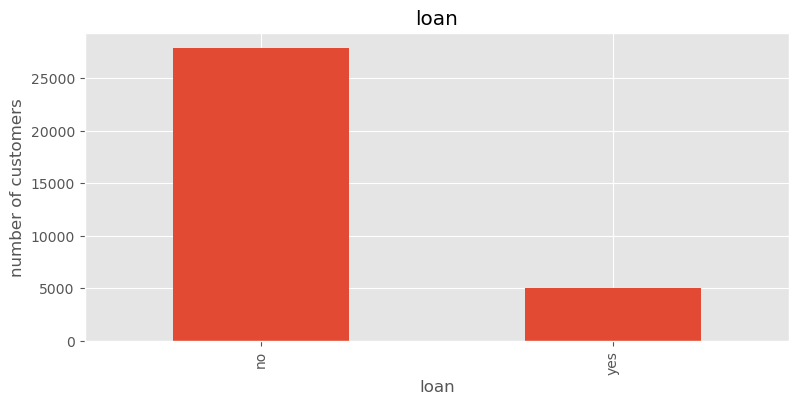

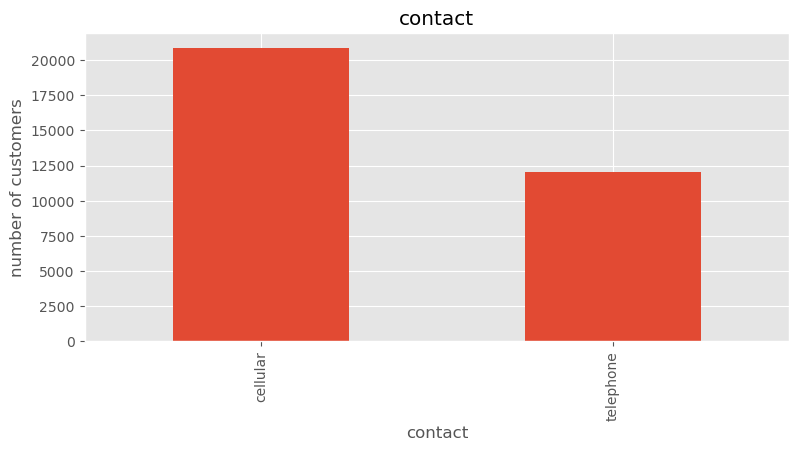

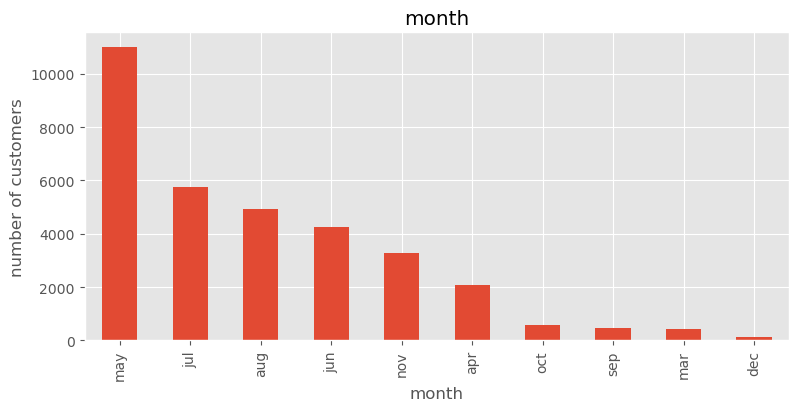

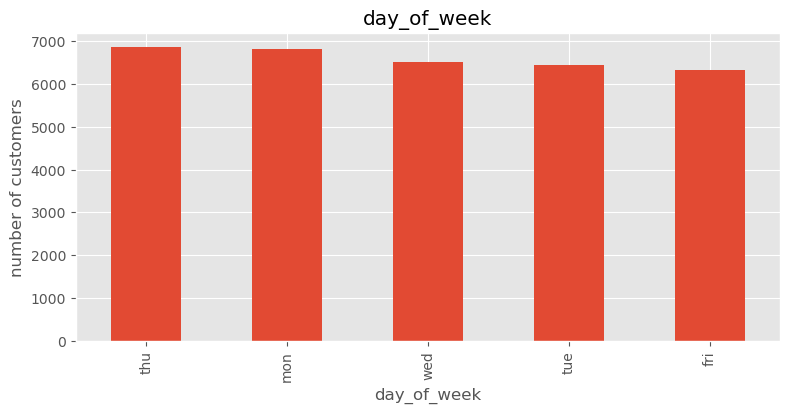

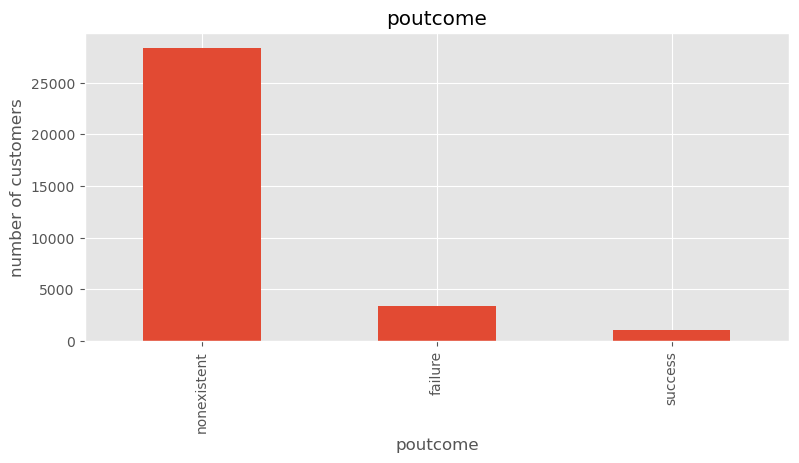

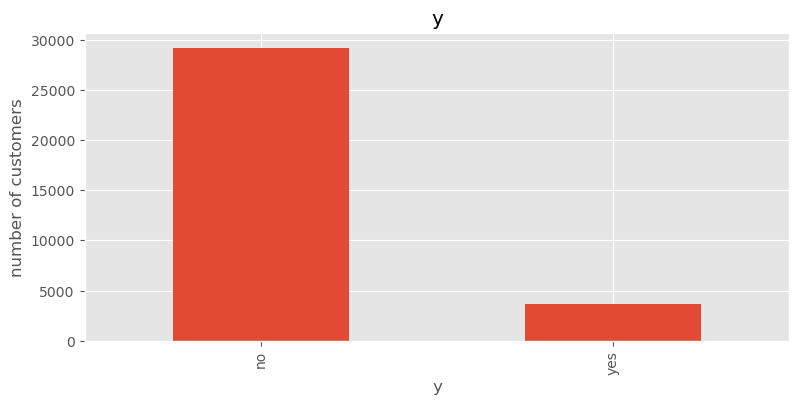

In [ ]:
plt.style.use("ggplot")

for column in catigorical_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

#Observations from above graphs
1)Top three professions are admin,blue-collar,technician
2)Married customers are more than single and divorced
3)Most customers are having university degree
4)Majority of the customers do not have a credit in default
5)Many customers applied Housing Loan than personal loan
6)customer contact is happened in month of May more than other months
7)The Target feature has imbalanced data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

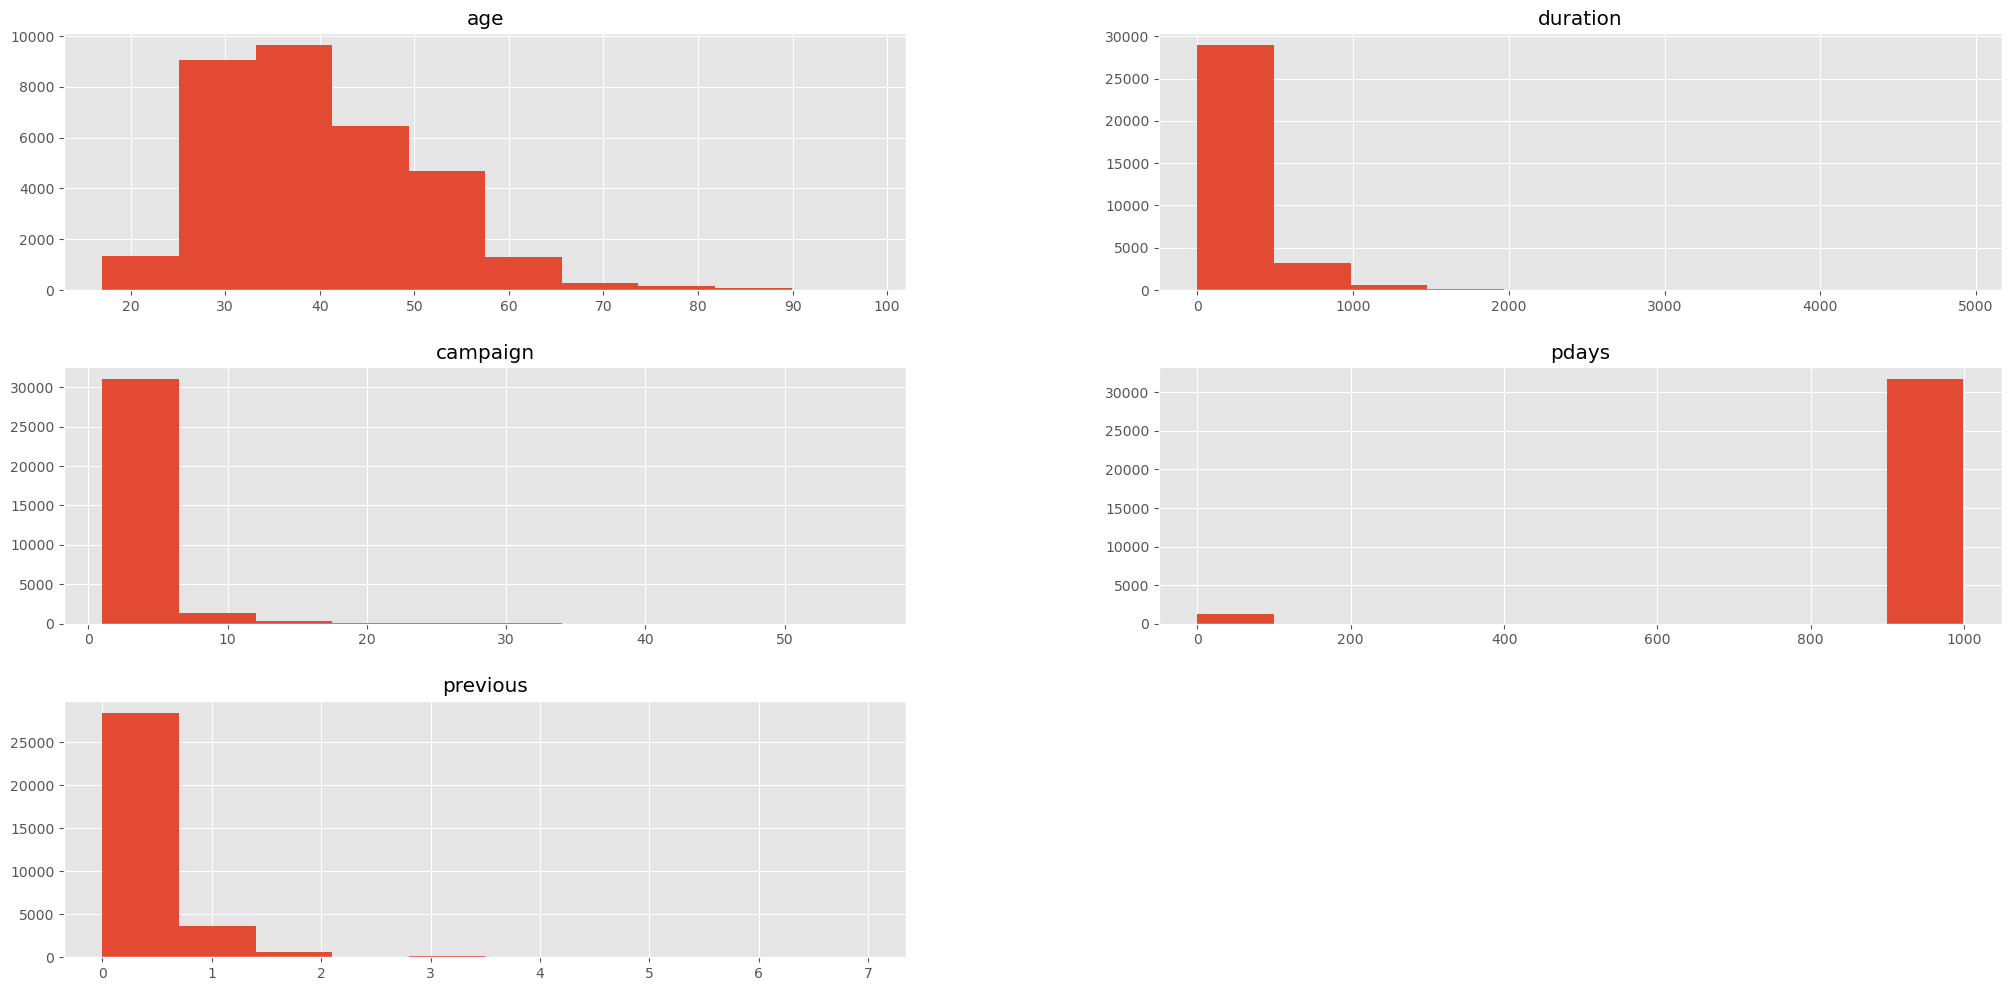

In [ ]:
df.hist(figsize=(25,12))

#Observations from above graphs
1)The data is skewed
2)we need to check for Outliers
3)as per pdays most values are near 1000 means the most customers are contacted for first time

#As we see that pdays and previous has not important for further anaysis we can drop them

In [ ]:
df.drop(columns=['previous', 'pdays'],axis=1,inplace=True)

In [ ]:
df.shape

(32942, 14)

## Bivariate Analysis

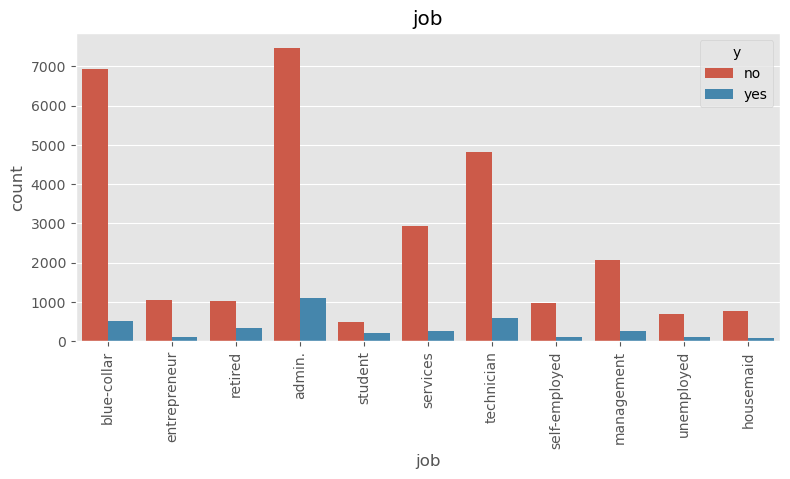

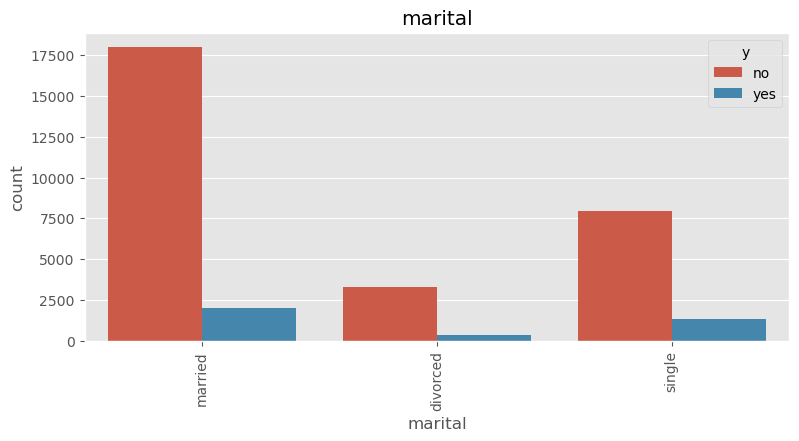

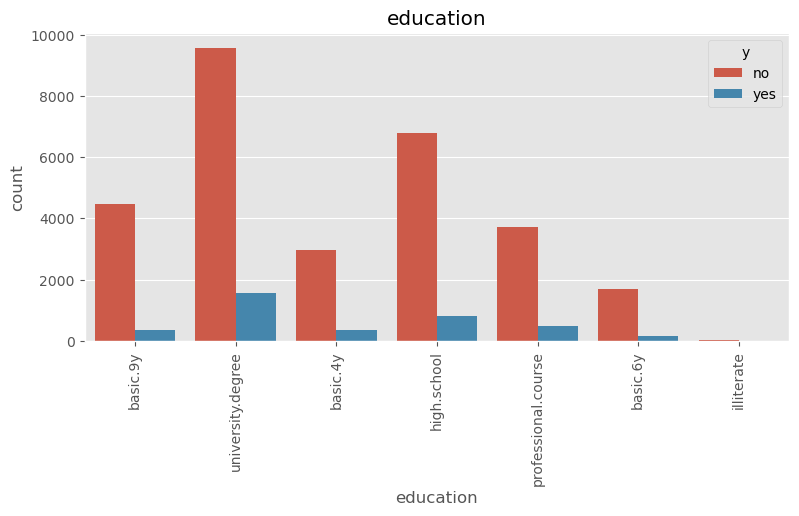

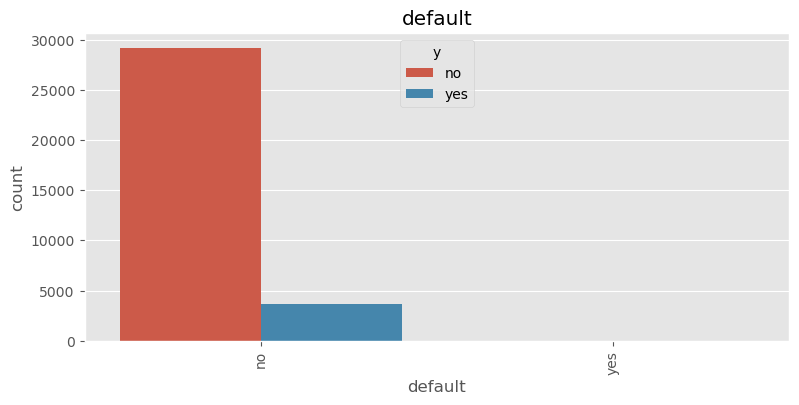

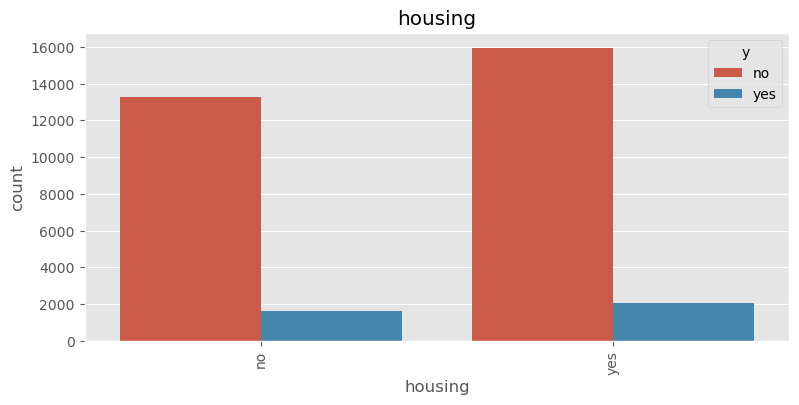

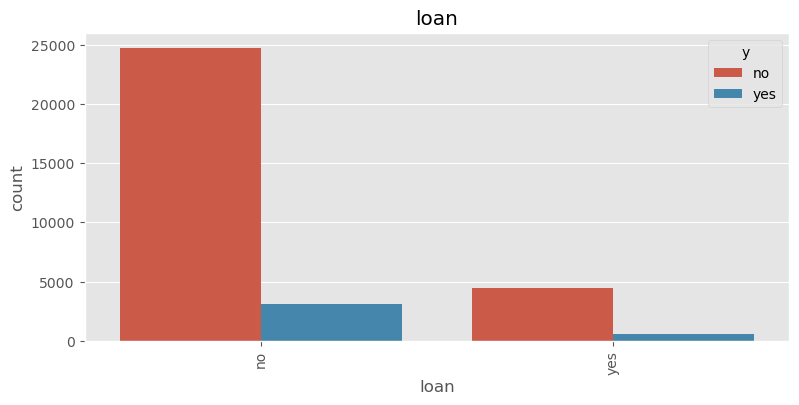

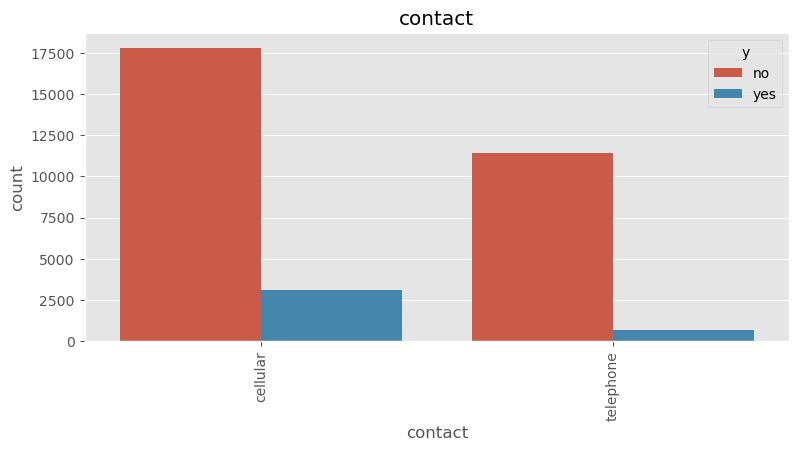

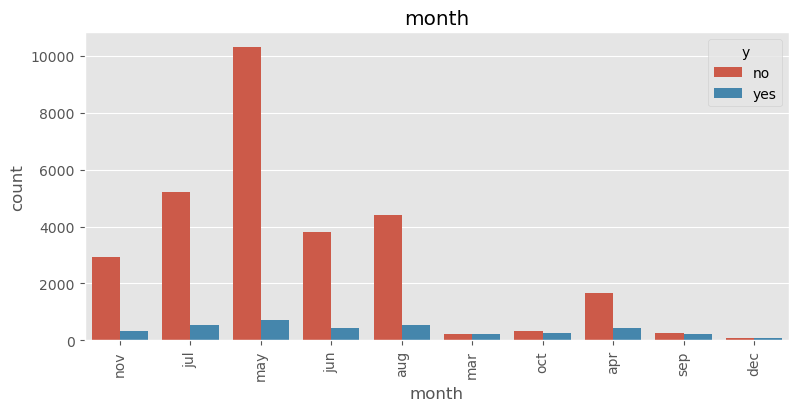

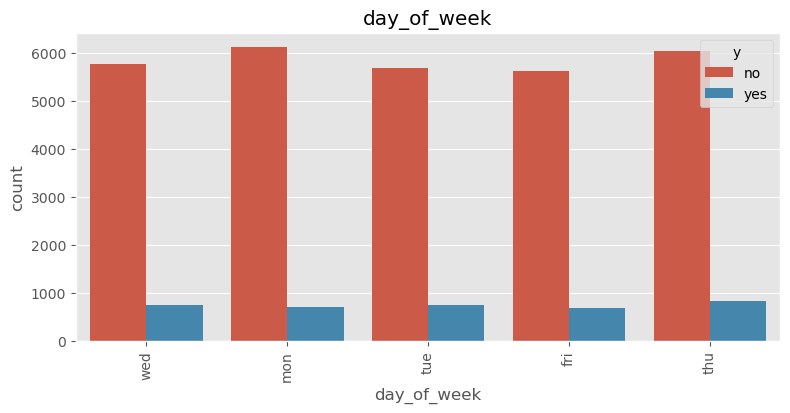

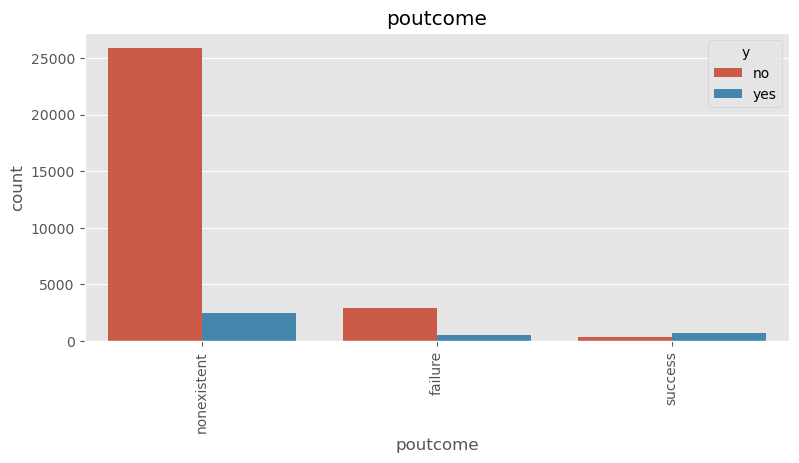

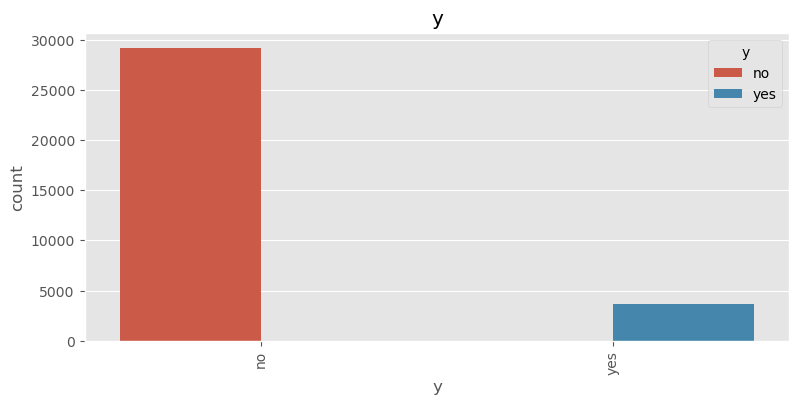

In [ ]:
plt.style.use("ggplot")
for column in catigorical_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["y"])
    plt.title(column)
    plt.xticks(rotation=90)

## Observations from above analysis is that
1)clients who opted for term deposit are jobs as admin,technician,blue-collor
2)clients who opted for term deposit are  married or single than divorced
3)clients who opted for term deposit are holding University Degree
4)clients who opted for term deposit are not having any loans
5)we can reach clients with mobiles than telephone

## handling Outliers

In [ ]:
numerical_features = df.select_dtypes(exclude="object").columns

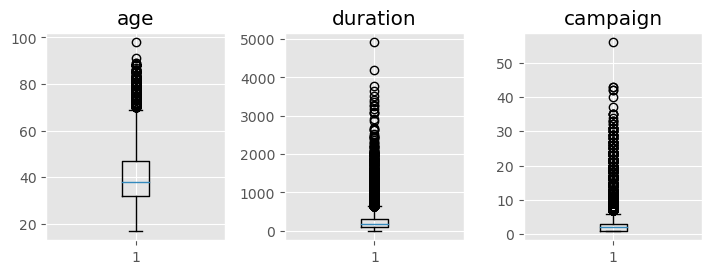

In [ ]:
plt.figure(figsize=(12, 10))

# Iterate over the numerical columns and create a box plot for each column
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    plt.boxplot(df[column])
    plt.title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# we can see there are outliers present in age,duration and campaign

In [ ]:
def detect_outliers(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    print(' #####',col,'#####')
    print("persentile25",q1)
    print("persentile75",q3)

    iqr = q3-q1
    upper_limit=q3 +1.5*iqr
    lower_limit=q1-1.5*iqr
    print("Upper Limit",upper_limit)
    print("Lower Limit",lower_limit)

    df.loc[(df[col])>upper_limit,col]=upper_limit
    df.loc[(df[col])<lower_limit,col]=lower_limit
    return df


In [ ]:
for col in numerical_features:
         detect_outliers(col)

 ##### age #####
persentile25 32.0
persentile75 47.0
Upper Limit 69.5
Lower Limit 9.5
 ##### duration #####
persentile25 103.0
persentile75 319.0
Upper Limit 643.0
Lower Limit -221.0
 ##### campaign #####
persentile25 1.0
persentile75 3.0
Upper Limit 6.0
Lower Limit -2.0


## Checking for Imbalanced data

In [ ]:
#The Target Column
df['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'Target Variable')

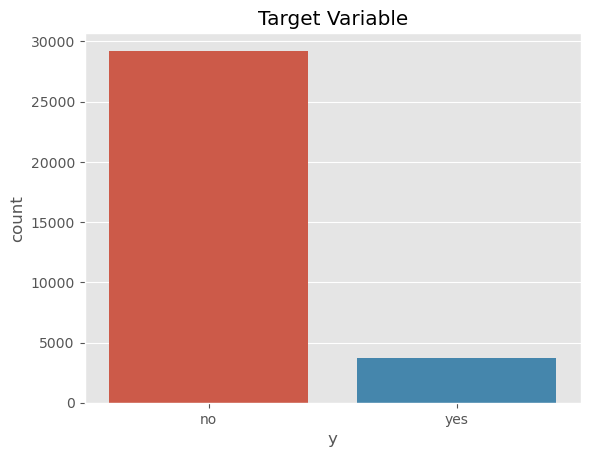

In [ ]:
# Here we can see the target class is highly imbalanced
sns.countplot(df['y'])
plt.title('Target Variable')

## seprating dependent and independent Features

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['y'], axis=1)
y = df['y']

* **Check all columns which are in Train data set**

In [ ]:
all_columns  = list(X.columns)
print(all_columns)
len(all_columns)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


13

***Feature Encoding***


***Extracting Categorical features from train set for feature encoding***

In [ ]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 10


**Checking for Unique variables in each column**

In [ ]:
for feature in cat_features:
    print(feature,' : ',X[feature].unique() )

job  :  ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital  :  ['married' 'divorced' 'single']
education  :  ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default  :  ['no' 'yes']
housing  :  ['no' 'yes']
loan  :  ['no' 'yes']
contact  :  ['cellular' 'telephone']
month  :  ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week  :  ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome  :  ['nonexistent' 'failure' 'success']


**as unique features are more if we use One_hot_Encoding it will create more columns so we will use label encoding**

In [ ]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']



# Define the numeric_transformer and oh_transformer
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', sparse=False)

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', oh_transformer, cat_features),
        ('num', numeric_transformer, num_features)
    ]
)

# Define the pipeline with the ColumnTransformer
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the pipeline to your data to get the processed output
X_preprocessed = pipeline.fit_transform(X)

# Encode the target variable 'y'
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Now X_preprocessed contains your processed features and y_encoded contains your encoded target variable
print(X_preprocessed)
print(y_encoded)


[[ 1.          0.          0.         ...  0.89459022 -0.04495336
   1.11798349]
 [ 0.          1.          0.         ... -0.28953977 -0.18630853
  -0.17538305]
 [ 0.          0.          0.         ...  2.91747894  2.30719661
  -0.82206632]
 ...
 [ 0.          0.          0.         ...  1.38797771 -0.5877572
   1.11798349]
 [ 0.          0.          0.         ... -1.07895976 -0.39551418
  -0.82206632]
 [ 0.          0.          0.         ... -0.48689477  1.74743015
   0.47130022]]
[0 0 1 ... 0 0 0]


In [ ]:
import pickle
pickle.dump(X_preprocessed, open('processed_data.pkl', 'wb'))

***Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data and encoded target variable into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((26353, 40), (6589, 40))

**Model Selection**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

In [ ]:


models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Support Vector Classifier": SVC()
}

for model_name, model in models.items():
    print(model_name)

    # Apply SMOTE to balance the class distribution
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train model on SMOTE balanced data
    model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9983
- Recall: 0.9997
----------------------------------
Model performance for Test set
- Accuracy: 0.8954
- F1 score: 0.8918
- Precision: 0.5643
- Recall: 0.4819


Naive Bayes
Model performance for Training set
- Accuracy: 0.6683
- F1 score: 0.7297
- Precision: 0.2233
- Recall: 0.7968
----------------------------------
Model performance for Test set
- Accuracy: 0.6608
- F1 score: 0.7211
- Precision: 0.2259
- Recall: 0.7778


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8846
- F1 score: 0.8949
- Precision: 0.4887
- Recall: 0.7560
----------------------------------
Model performance for Test set
- Accuracy: 0.8786
- F1 score: 0.8888
- Precision: 0.4889
- Recall: 0.7390


Logistic Regression
Model performance for Training set
- Accuracy: 0.8391
- F1 score: 0.8617
- Precision: 0.3947
- Recall: 0.8302
----------------------------------
Model performance for Test set
-

*Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

# Models to tune
models_to_tune = {
    "Random Forest": RandomForestClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

# Parameter grids for the models to tune
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Neighbors Classifier": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance'],
        "p": [1, 2]
    },
    "XGBClassifier": {
        "learning_rate": [0.1, 0.01],
        "max_depth": [5, 8],
        "n_estimators": [100, 200],
        "colsample_bytree": [0.5, 0.8]
    }
}

# Loop through models to tune
for model_name, model in models_to_tune.items():
    print("Tuning hyperparameters for", model_name)

    # Apply SMOTE to balance the class distribution
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]

    # Create a GridSearchCV instance for the current model
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=1)

    # Fit the GridSearchCV instance on the data
    grid_search.fit(X_train_smote, y_train_smote)

    # Get the best hyperparameters and the corresponding best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best parameters:", best_params)
    print("Best cross-validation score:", best_score)

    # Train the model with the best hyperparameters on the entire training data
    best_model = model.set_params(**best_params)  # Set the best hyperparameters
    best_model.fit(X_train_smote, y_train_smote)

    # Evaluate the best model on the test data
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Test set accuracy with best model:", test_accuracy)
    print("=" * 50)


Tuning hyperparameters for Random Forest
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9522955370489002
Test set accuracy with best model: 0.8963423888298679
Tuning hyperparameters for K-Neighbors Classifier
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.9491138159299595
Test set accuracy with best model: 0.8653816967673396
Tuning hyperparameters for XGBClassifier
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Best cross-validation score: 0.928165705744181
Test set accuracy with best model: 0.8981636060100167


## Plot ROC-AUC curve

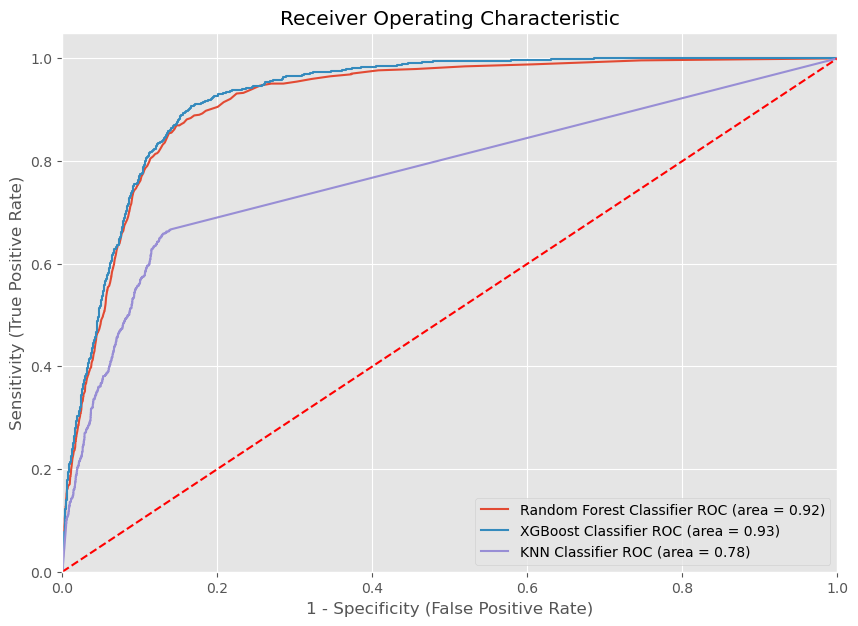

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
# Models to plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features='auto', max_depth=None),
        'params': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200},
        'auc': 0.95229
    },
    {
        'label': 'XGBoost Classifier',
        'model': XGBClassifier(n_estimators=200, max_depth=20, learning_rate=0.1, colsample_bytree=0.8, n_jobs=-1),
        'params': {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100},
        'auc': 0.9281
    },
    {
        'label': 'KNN Classifier',
        'model': KNeighborsClassifier(n_neighbors=10),
        'params': {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
        'auc':  0.9491
    }

]

# Plot ROC-AUC curves for each model
plt.figure(figsize=(10, 7))

for m in auc_models:
    model = m['model']
    params = m['params']
    model.set_params(**params)

    model.fit(X_train, y_train)

    # Compute False positive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate Area under the curve to display on the plot
    auc_value = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc_value))

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'r--')

# Custom settings for the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Create the directory if it doesn't exist
output_directory = './images/roc_auc/'
os.makedirs(output_directory, exist_ok=True)

# Save the plot as an image
plt.savefig('./images/roc_auc/auc.png')

# Display the plot
plt.show()


In [ ]:
best_xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate= 0.1, max_depth= 8, n_estimators= 100)
best_xgb = best_xgb.fit(X_train,y_train)
xgb_pred = best_xgb.predict(X_test)
score = accuracy_score(y_test,xgb_pred)
cr = classification_report(y_test,xgb_pred)

print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9007
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5815
           1       0.62      0.40      0.49       774

    accuracy                           0.90      6589
   macro avg       0.77      0.69      0.72      6589
weighted avg       0.89      0.90      0.89      6589



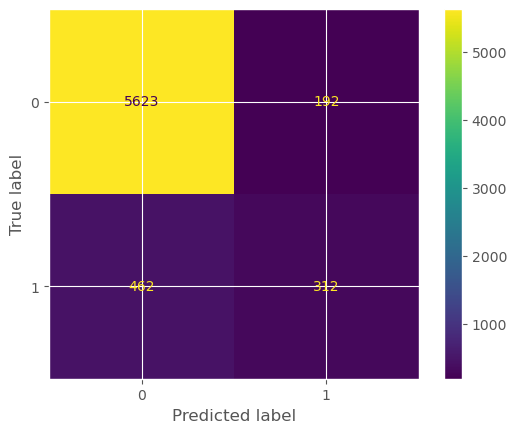

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)

In [ ]:
import pickle

# Save the trained model as a pickle file.
pickle.dump(best_xgb, open('classificationmodel.pkl', 'wb'))